<a href="https://colab.research.google.com/github/karthikdoguparthi/Uber-Supply-Demand-Gaps/blob/main/UBER_Supply_Demand_Gaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - UBER SUPPLY DEMAND GAPS



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -** Karthik Doguparthi


# **Project Summary -**

I worked on analyzing Uber ride request data to identify rider behavior patterns. The dataset included over 6,700 records with several missing values, unstructured timestamps, and mixed data types.

I cleaning the raw CSV file in Excel. I changed the timestamp formats, replaced 'NA' values, and created new columns such as **Day Category** (Early Morning, Morning, Evening, Night, Late Night) and **Travel Time** (Difference between Req_timestamp and Drop_timestamp) to give better analysis. I changed the mixed datatype date format to standard date format for the columns Request timestamp and drop timestamp and split them to different columns based on delimiter. with this the dataset is ready for analysis and visualization.

Using Excel, I built dashboards with pivot tables and charts to visualize trends in request status, pickup points, and time of day. I identified the imbalance between ride demand and driver availability.

I imported the cleaned dataset into VS Code after converting all time fields into valid DATETIME format and handling missing values correctly. I wrote SQL queries to extract more specific insights. I analyzed hourly request distribution, cancellation rates across different pickup points, and patterns around high-demand periods. This project helped me identify when and where Uber might need to allocate more drivers or address operational gaps.

# **GitHub Link -**

https://github.com/karthikdoguparthi/Uber-Supply-Demand-Gaps

# **Problem Statement**


Performing EDA and finding insights about Uber Supply Gaps.

#### **Define Your Business Objective?**

To maximize ride fulfillment and minimize cancellations and unserved requests by identifying demand supply in Uber ride request system.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [32]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

### Dataset Loading

In [33]:
# Load Dataset
dataset = pd.read_csv('/content/cleaned_data.csv')

### Dataset First View

In [34]:
# Dataset First Look
dataset.head()

,Request id,Pickup point,Driver id,Status,Request,Req_timestamp,Day Category,Drop,Drop_timestamp,Travel Time,Distance
0,619,Airport,1.0,Trip Completed,11-07-2016,11:51:00 AM,Morning,11-07-2016,1:00:00 PM,1:09:00,Far
1,867,Airport,1.0,Trip Completed,11-07-2016,5:57:00 PM,Evening,11-07-2016,6:47:00 PM,0:50:00,Medium
2,1807,City,1.0,Trip Completed,12-07-2016,9:17:00 AM,Morning,12-07-2016,9:58:00 AM,0:41:00,Medium
3,2532,Airport,1.0,Trip Completed,12-07-2016,9:08:00 PM,Night,12-07-2016,10:03:00 PM,0:55:00,Medium
4,3112,City,1.0,Trip Completed,13-07-2016,8:33:16 AM,Morning,13-07-2016,9:25:47 AM,0:52:31,Medium


### Dataset Rows & Columns count

In [35]:
# Dataset Rows & Columns count
dataset.shape

(6745, 11)

### Dataset Information

In [36]:
# Dataset Info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Request id      6745 non-null   int64  
 1   Pickup point    6745 non-null   object 
 2   Driver id       4095 non-null   float64
 3   Status          6745 non-null   object 
 4   Request         6745 non-null   object 
 5   Req_timestamp   6745 non-null   object 
 6   Day Category    6745 non-null   object 
 7   Drop            2831 non-null   object 
 8   Drop_timestamp  2831 non-null   object 
 9   Travel Time     2831 non-null   object 
 10  Distance        6745 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 579.8+ KB


#### Duplicate Values

In [37]:
# Dataset Duplicate Value Count
dataset.duplicated().sum()

np.int64(0)

#### Missing Values/Null Values

In [38]:
# Missing Values/Null Values Count
dataset.isnull().sum()

,0
Request id,0
Pickup point,0
Driver id,2650
Status,0
Request,0
Req_timestamp,0
Day Category,0
Drop,3914
Drop_timestamp,3914
Travel Time,3914


In [39]:
# Visualizing the missing values
dataset[dataset.isnull().any(axis=1)]

,Request id,Pickup point,Driver id,Status,Request,Req_timestamp,Day Category,Drop,Drop_timestamp,Travel Time,Distance
2831,2905,City,1.0,Cancelled,13-07-2016,6:08:41 AM,Morning,NaN,NaN,NaN,Unknown
2832,4805,City,1.0,Cancelled,14-07-2016,5:07:58 PM,Evening,NaN,NaN,NaN,Unknown
2833,5202,Airport,1.0,Cancelled,14-07-2016,8:51:37 PM,Evening,NaN,NaN,NaN,Unknown
2834,5927,City,1.0,Cancelled,15-07-2016,10:12:40 AM,Morning,NaN,NaN,NaN,Unknown
2835,2347,Airport,2.0,Cancelled,12-07-2016,7:14:00 PM,Evening,NaN,NaN,NaN,Unknown
...,...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016,11:49:03 PM,Night,NaN,NaN,NaN,Unknown
6741,6752,Airport,NaN,No Cars Available,15-07-2016,11:50:05 PM,Night,NaN,NaN,NaN,Unknown
6742,6751,City,NaN,No Cars Available,15-07-2016,11:52:06 PM,Night,NaN,NaN,NaN,Unknown
6743,6754,City,NaN,No Cars Available,15-07-2016,11:54:39 PM,Night,NaN,NaN,NaN,Unknown


In [40]:
# Count and breakdown of non-completed trips
print(dataset[dataset['Status'] != 'Trip Completed']['Status'].value_counts())
print("\nTotal non-completed trips:", (dataset['Status'] != 'Trip Completed').sum())

Status
No Cars Available    2650
Cancelled            1264
Name: count, dtype: int64

Total non-completed trips: 3914


### What did you know about your dataset?

The dataset contains 6,745 ride request records from Uber, with information about individual ride.
*	Request ID: Identifier for each ride request
*	Pickup Point: City or Airport
*	Driver ID: Identifier for the driver assigned
*	Status: Completed, Cancelled, or No Cars Available
*	Request Timestamp: Time ride was requested
*	Drop Timestamp: Time ride was completed


  Fields Created:
*	Travel Time: Duration between request and drop
*	Distance covered (Near, Medium, Far, Unknown)
*	Day Category (Early Morning, Morning, Evening, Night, Late Night)

Cleaned and standardized timestamps.


## ***2. Understanding Your Variables***

In [41]:
# Dataset Columns
dataset.columns

Index(['Request id', 'Pickup point', 'Driver id', 'Status', 'Request',
       'Req_timestamp', 'Day Category', 'Drop', 'Drop_timestamp',
       'Travel Time', 'Distance'],
      dtype='object')

In [42]:
# Dataset Describe Int Values
dataset.describe()

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


In [43]:
# Dataset Describe Object Values
dataset.describe(include='object')

,Pickup point,Status,Request,Req_timestamp,Day Category,Drop,Drop_timestamp,Travel Time,Distance
count,6745,6745,6745,6745,6745,2831,2831,2831,6745
unique,2,3,5,4955,6,6,2393,1325,4
top,City,Trip Completed,15-07-2016,9:40:00 AM,Morning,11-07-2016,9:53:00 PM,0:49:00,Unknown
freq,3507,2831,1381,9,2517,582,6,40,3914


### Variables Description

The dataset includes variables like Request id, Pickup point, Driver id, and Status to track each ride request. Timestamps (Req_timestamp, Drop_timestamp) capture when rides were requested and completed, while Travel Time and Distance give trip duration. Columns like Day Category help classify requests by Time of day.

### Check Unique Values for each variable.

In [44]:
# Check Unique Values for each variable.
dataset.nunique()

,0
Request id,6745
Pickup point,2
Driver id,300
Status,3
Request,5
Req_timestamp,4955
Day Category,6
Drop,6
Drop_timestamp,2393
Travel Time,1325


## 3. ***Data Wrangling***

### Data Wrangling Code

In [45]:
# Write your code to make your dataset analysis ready.
# Fill missing 'Driver id' values with 0 before converting to integer
dataset['Driver id'] = dataset['Driver id'].fillna(0).astype('int64')

completed_trips = dataset[dataset['Status'] == 'Trip Completed'] # used in chart 3 and 4
incomplete_trips = dataset[dataset['Status'].isin(['Cancelled', 'No Cars Available'])]
unknown_trips = dataset[dataset['Distance'] == 'Unknown'] #used in chart 13

In [46]:
dataset.head()

,Request id,Pickup point,Driver id,Status,Request,Req_timestamp,Day Category,Drop,Drop_timestamp,Travel Time,Distance
0,619,Airport,1,Trip Completed,11-07-2016,11:51:00 AM,Morning,11-07-2016,1:00:00 PM,1:09:00,Far
1,867,Airport,1,Trip Completed,11-07-2016,5:57:00 PM,Evening,11-07-2016,6:47:00 PM,0:50:00,Medium
2,1807,City,1,Trip Completed,12-07-2016,9:17:00 AM,Morning,12-07-2016,9:58:00 AM,0:41:00,Medium
3,2532,Airport,1,Trip Completed,12-07-2016,9:08:00 PM,Night,12-07-2016,10:03:00 PM,0:55:00,Medium
4,3112,City,1,Trip Completed,13-07-2016,8:33:16 AM,Morning,13-07-2016,9:25:47 AM,0:52:31,Medium


In [47]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Request id      6745 non-null   int64 
 1   Pickup point    6745 non-null   object
 2   Driver id       6745 non-null   int64 
 3   Status          6745 non-null   object
 4   Request         6745 non-null   object
 5   Req_timestamp   6745 non-null   object
 6   Day Category    6745 non-null   object
 7   Drop            2831 non-null   object
 8   Drop_timestamp  2831 non-null   object
 9   Travel Time     2831 non-null   object
 10  Distance        6745 non-null   object
dtypes: int64(2), object(9)
memory usage: 579.8+ KB


### What all manipulations have you done and insights you found?

I have changed the datatype of column Driver id from float to int and replaced all NA values in the column to 0.

I created a calculated field completed trips to select only rows which is a successfully completed trip.

I created a calculated field unknown trips to select only rows which are incompleted trips.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

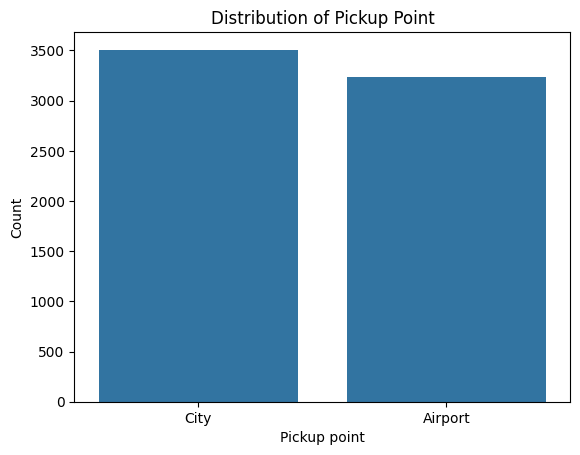

In [48]:
# Chart - 1 visualization code
# Distribution of Pickup Point
sns.countplot(data=dataset, x='Pickup point', order=dataset['Pickup point'].value_counts().index)
plt.title('Distribution of Pickup Point')
plt.xlabel('Pickup point')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

I used bar chart as univariate chart to show the count.

##### 2. What is/are the insight(s) found from the chart?

More cars are booked from city compared to airport.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Uber gets to know where the business is more.

#### Chart - 2

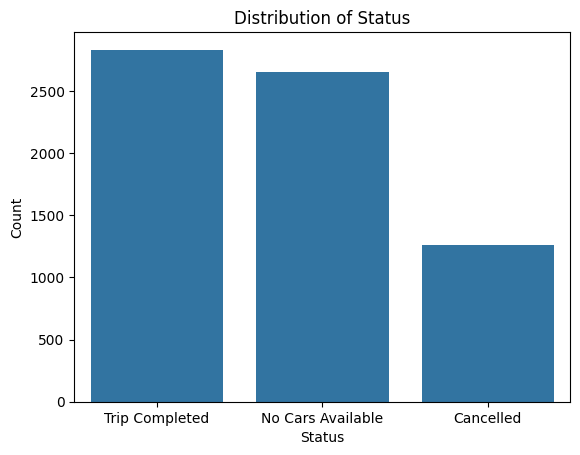

In [49]:
# Chart - 2 visualization code
# Distribution of Status
sns.countplot(data=dataset, x='Status', order=dataset['Status'].value_counts().index)
plt.title('Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

I used bar chart as univariate chart to show the count.

##### 2. What is/are the insight(s) found from the chart?

Though the trip completions are more we also have a high count of No car avalability and cancellations.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Uber can give special offers to who are completing trips and promote coupons to people who are cancelling trips for various reasons to start using the app again.

#### Chart - 3

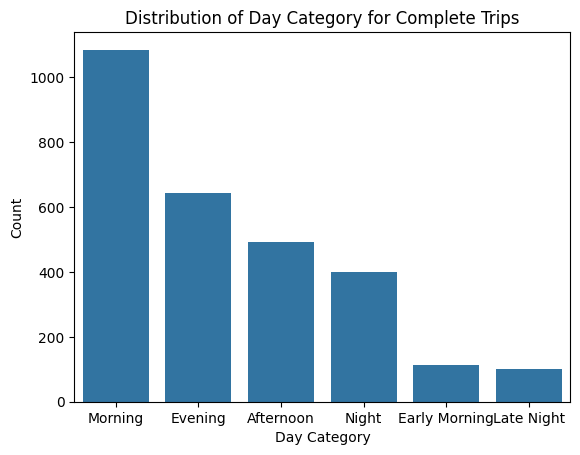

In [50]:
# Chart - 3 visualization code
# Distribution of Day Category for Complete Trips
sns.countplot(data=completed_trips, x='Day Category', order=completed_trips['Day Category'].value_counts().index)
plt.title('Distribution of Day Category for Complete Trips')
plt.xlabel('Day Category')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

I used bar chart as univariate chart to show the count.

##### 2. What is/are the insight(s) found from the chart?

Shows what time of the day people are booking cars the most.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Prices can be assigned as per the usage and day category to give benefits to customers to use the app more.

#### Chart - 4

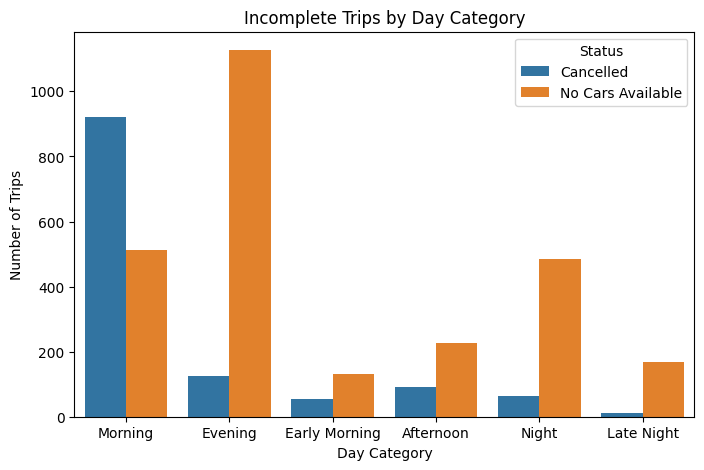

In [51]:
# Chart - 4 visualization code
# Incomplete Trips by Day Category
plt.figure(figsize=(8,5))
sns.countplot(data=incomplete_trips, x='Day Category', hue='Status')
plt.title('Incomplete Trips by Day Category')
plt.xlabel('Day Category')
plt.ylabel('Number of Trips')
plt.show()

##### 1. Why did you pick the specific chart?

I used bar chart as univariate chart to show the count.

##### 2. What is/are the insight(s) found from the chart?

Most cancelled trips are during morning.

Most no cars available is during evenings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Uber gets to know when and where to assign drivers for more business.

#### Chart - 5

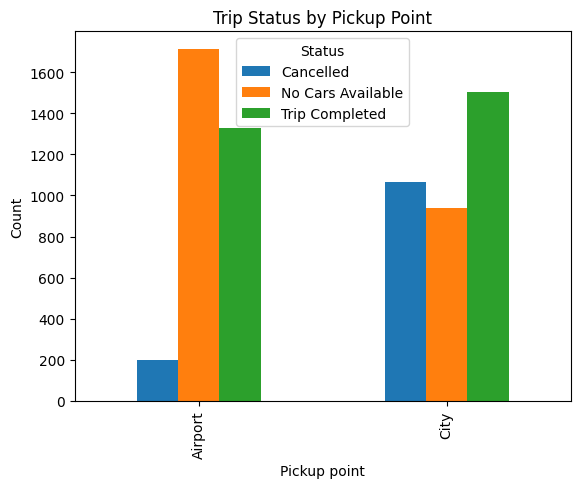

In [52]:
# Chart - 5 visualization code
# Pickup point vs Status
pd.crosstab(dataset['Pickup point'], dataset['Status']).plot(kind='bar')
plt.title('Trip Status by Pickup Point')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

I used bar chart as univariate chart to show the count.

##### 2. What is/are the insight(s) found from the chart?

Cancelled trips are most from City.

Airport has no available cars because of the demand.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Uber needs to ensure there are enough cars from airport by increasing the supply. As there are more cancelled cars from city, they can be replaced to the airport location.

#### Chart - 6

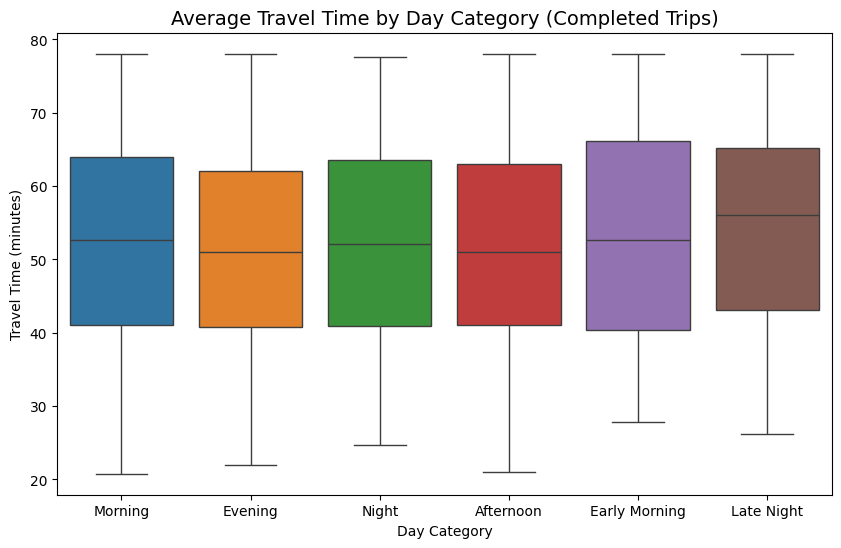

In [53]:
# Chart - 6 visualization code
# Average travel time by day category for completed trips
completed = dataset.loc[dataset['Status'] == 'Trip Completed'].copy()
completed.loc[:, 'Travel Time (mins)'] = pd.to_timedelta(completed['Travel Time'], errors='coerce').dt.total_seconds() / 60
cutoff = completed['Travel Time (mins)'].quantile(0.99)
filtered = completed.loc[completed['Travel Time (mins)'] < cutoff]

plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered, x='Day Category', y='Travel Time (mins)', hue='Day Category')
plt.title('Average Travel Time by Day Category (Completed Trips)', fontsize=14)
plt.ylabel('Travel Time (minutes)')
plt.xlabel('Day Category')
plt.show()

##### 1. Why did you pick the specific chart?

I used box chart to find the average range and median.

##### 2. What is/are the insight(s) found from the chart?

Avg travel time for completed trips no matter the day category is around 50 mins. Most travelled ranges are from 40 to 65 mins.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Uber can supply coupons or credits for travelling atleast 50 mins for using their service.

#### Chart - 7

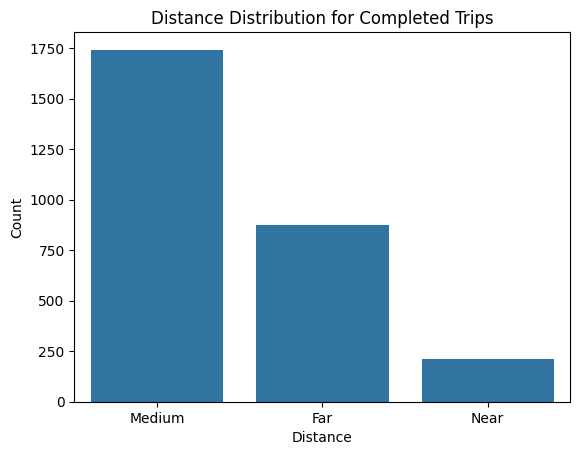

In [54]:
# Chart - 7 visualization code
# Distance Distribution for Completed Trips
sns.countplot(data=completed_trips, x='Distance', order=completed_trips['Distance'].value_counts().index)
plt.title('Distance Distribution for Completed Trips')
plt.xlabel('Distance')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

I used this Univariant bar chart to show the count of the variables.

##### 2. What is/are the insight(s) found from the chart?

The graph shows that most of the trips are medium distance which I categorized with travel time > 1hr

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Uber can provide discount to the customers who are travelling for the average time using their service.

#### Chart - 8

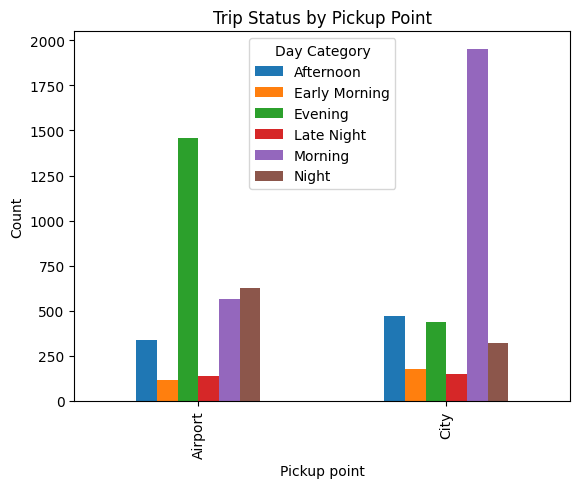

In [55]:
# Chart - 8 visualization code
# Bar chart based on Pickup point and Day category count
pd.crosstab(dataset['Pickup point'], dataset['Day Category']).plot(kind='bar')
plt.title('Trip Status by Pickup Point')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

I used this Bivariant bar chart to show how these variablea are related to each other.

##### 2. What is/are the insight(s) found from the chart?

This chart shows how many trips are done from airport or city at various day categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Uber can identify the peak time and peak zone to allocate drivers and also be used for either giving offer on prices or hike up the prices.

#### Chart - 9

In [56]:
# Chart - 9 visualization code
# Treemap to show Pickup point with Day category
tree_data = dataset.groupby(['Pickup point', 'Day Category']).size().reset_index(name='count')
treemap = px.treemap(tree_data,path=['Pickup point', 'Day Category'],values='count')
treemap.show()

##### 1. Why did you pick the specific chart?

I used this tree map to show compare each category with all other sub categories.

##### 2. What is/are the insight(s) found from the chart?

Uber has most business during morning in the city and during evenings at the airport.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Uber will get to know the demaning timings for the location either city or airport.

#### Chart - 10

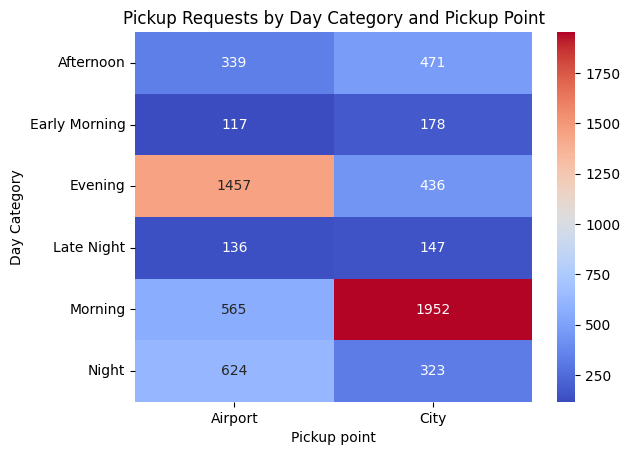

In [57]:
# Chart - 10 visualization code
# Correlation Heatmap
heatmap_data = pd.crosstab(dataset['Day Category'], dataset['Pickup point'])
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='coolwarm')
plt.title('Pickup Requests by Day Category and Pickup Point')
plt.show()

##### 1. Why did you pick the specific chart?

I used correlation map to understand relationship between the numerical values.

##### 2. What is/are the insight(s) found from the chart?

The higher the values, the higher the demand.

Morning in the city, Evening at the airport.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

City trips dominate on weekdays. Airport pickups are more balanced, indicating steady travel.

#### Chart - 11

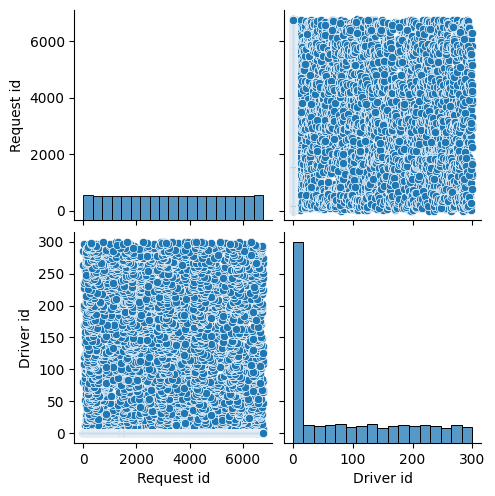

In [58]:
# Chart - 11 visualization code
# Pairplot
sns.pairplot(dataset)
plt.show()

##### 1. Why did you pick the specific chart?

I used pairplot to visualize relationships between multiple numeric variables.


##### 2. What is/are the insight(s) found from the chart?

Travel time is normally distributed, while driver activity is skewed toward lower IDs, suggesting unequal driver engagement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Uber should optimize driver allocation by maintaining balanced trip distribution to increase efficiency.

#### Chart - 12

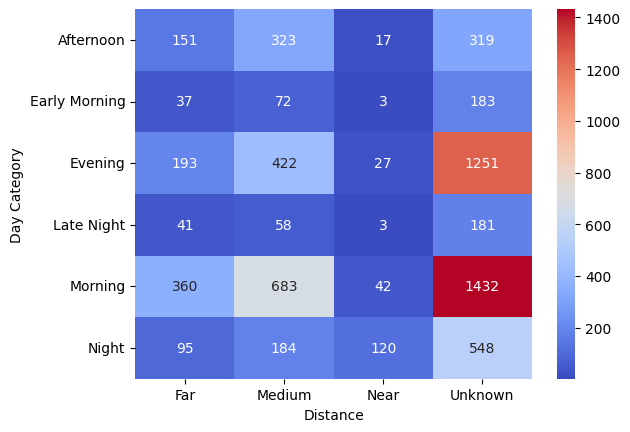

In [59]:
# Chart - 12 visualization code
# Heatmap between Distance and Day Category
heatmap_data = pd.crosstab(dataset['Day Category'], dataset['Distance'])
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='coolwarm')
plt.show()

##### 1. Why did you pick the specific chart?

I used heatmap to show how the variables are correlated to each other.

##### 2. What is/are the insight(s) found from the chart?

Mostly client travelled medium distance and also many trips are cancelled during mornings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Uber will get to know when to assign more drivers to improve business.

#### Chart - 13

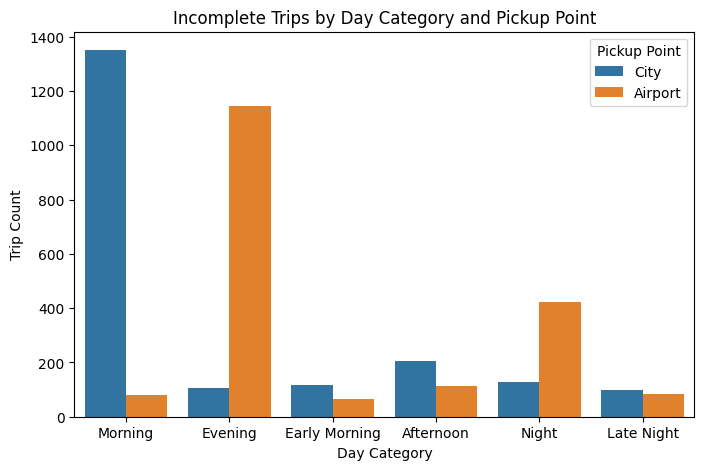

In [60]:
# Chart - 13 visualization code
# Incomplete Trips by Day Category and Pickup Point
plt.figure(figsize=(8,5))
sns.countplot(data=unknown_trips, x='Day Category', hue='Pickup point')
plt.title('Incomplete Trips by Day Category and Pickup Point')
plt.xlabel('Day Category')
plt.ylabel('Trip Count')
plt.legend(title='Pickup Point')
plt.show()

##### 1. Why did you pick the specific chart?

I used Univariant bar chart to show the count.

##### 2. What is/are the insight(s) found from the chart?

Cancelled / No availability of cars is high during morning in City.

Cancelled / No availability of cars is high during evening at Airport.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Uber can arrange or increase the supply of drivers during incomplete trips to increase the business.

#### Chart - 14 - Correlation Heatmap

In [61]:
# Correlation Heatmap visualization code


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [62]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Increasing driver availability at the Airport during early morning hours as the most requirement will be away from the city rather in the city can be a big plus to the business.

# **Conclusion**

This project helped me connect the dots between raw operational data and actionable business insights. By cleaning dataset in Excel, visualizing trends through dashboards, and using SQL for deeper analysis, I was able to identify clear patterns in user demand, driver availability, and request outcomes. The most critical insight was the supply demand mismatch during peak hours.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***